# Comprehensive Analysis of Student Well-being: Insights from TSYP Challenge Data

This Jupyter Notebook presents an in-depth analysis of student well-being, mental health, and academic performance as part of the TSYP Challenge. Our objective is to uncover critical insights that can inform strategies to improve the overall educational experience and support systems for students.

The notebook is structured to guide the reader through various stages of the analytical process:

# 1- Data Preparation and Cleaning: 
We begin by loading three distinct datasets and performing necessary preprocessing steps. This includes standardizing column names, handling missing values, normalizing data scales, and ensuring appropriate data types for analysis.

# 2- Exploratory Data Analysis (EDA): 
We delve into each dataset to understand the underlying distributions, identify patterns, and detect anomalies. This section provides a foundational understanding of the datasets' characteristics through visualizations and descriptive statistics.

# 3- Statistical Analysis: 
This section involves applying statistical tests to draw meaningful conclusions from the data. We explore correlations, compare 
different student groups, and identify significant factors impacting student well-being and academic performance.

# 4- Machine Learning Analysis: 
Leveraging machine learning techniques, we predict outcomes and classify data to provide deeper insights. This could include predicting stress levels based on lifestyle choices or categorizing students into different well-being categories based on various indicators.

# 5- Data Visualization: 
We employ a range of visual tools to present our findings clearly and compellingly. These visualizations aid in highlighting key insights and patterns within the data.

# 6- Insights and Recommendations: 
The final part of the notebook synthesizes the analysis into actionable insights. We discuss the implications of our findings and suggest potential interventions or policy changes that could positively impact student well-being and academic success.

# 7- Conclusion: 
We conclude with a summary of our findings, the limitations of our analysis, and suggestions for future research.

This notebook serves as a comprehensive resource for educators, policymakers, and researchers interested in understanding and improving student well-being in educational settings. Through our analysis, we aim to contribute valuable insights that can shape more supportive, effective, and resilient educational environments.

In [1]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [2]:
def standardize_column_names(df):
    """
    Standardizes column names: lower case and underscores instead of spaces.
    """
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [3]:
def handle_missing_data(df):
    """
    Handles missing data: fills numeric columns with the mean and categorical with the mode.
    """
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)
    return df

In [4]:
def convert_data_types(df):
    """
    Convert data types: converts string representations of numbers to actual numeric types.
    """
    for column in df.columns:
        if df[column].dtype == 'object':
            try:
                df[column] = pd.to_numeric(df[column])
            except ValueError:
                pass
    return df

In [5]:
def normalize_data(df, feature_range=(1, 10)):
    """
    Normalize data: scales numeric data to be within a specific range (e.g., 1-10).
    """
    scaler = MinMaxScaler(feature_range=feature_range)
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

In [6]:
def preprocess_data(df):
    """
    Preprocesses data: standardizes column names, handles missing data, converts data types, and normalizes data.
    """
    df = standardize_column_names(df)
    df = handle_missing_data(df)
    df = convert_data_types(df)
    return df

In [7]:
def combine_dataframes(df1, df2):
    """
    Combines two dataframes with the same column names and ignores non-existing columns.
    
    :param df1: First DataFrame
    :param df2: Second DataFrame
    :return: Combined DataFrame
    """
    common_columns = df1.columns.intersection(df2.columns)

    # Select only the common columns from each dataframe
    df1_common = df1[common_columns]
    df2_common = df2[common_columns]

    # Concatenate the dataframes along the rows
    combined_df = pd.concat([df1_common, df2_common], ignore_index=True)

    return combined_df

In [8]:
def change_values(df, column, mapping):
    df[column] = df[column].replace(mapping)
    return df

In [9]:
# Function to create histograms
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(10,4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.show()

# Data loading and preprocessing

In [10]:
df = pd.read_csv('dataset/students_mental_health_survey.csv')
df = preprocess_data(df)
df.head()

,age,gender,stress_level,depression_score,anxiety_score,physical_activity,social_support,relationship_status,chronic_illness
0,25,Male,3,3,2,Moderate,Moderate,Married,No
1,24,Female,0,3,0,Low,Low,Single,No
2,19,Female,4,0,3,Low,Moderate,In a Relationship,No
3,19,Male,2,1,0,Low,Moderate,Single,No
4,18,Male,3,3,4,Low,High,Married,Yes


In [11]:
df1 = pd.read_csv('dataset/Understanding the Well-being of Students.csv')
df1 = preprocess_data(df1)
df1.head()

,age,gender,education_level,how_often_do_you_engage_in_social_activities?,how_satisfied_are_you_with_your_current_social_relationships?,do_you_feel_supported_by_your_peers_and_family?,how_would_you_rate_your_overall_physical_health?,do_you_have_any_chronic_physical_health_conditions?,how_often_do_you_engage_in_physical_exercise?,how_often_do_you_feel_stressed_or_overwhelmed?,...,rate_your_ability_to_recover_from_emotional_challenges.,do_you_feel_emotionally_supported_by_your_peers_and_faculty?,do_you_feel_your_coursework_is_manageable?_,how_do_you_perceive_your_academic_performance?,does_your_mental_and_physical_health_affect_your_studies?,what_support_do_you_think_would_improve_your_academic_success?,how_satisfied_are_you_with_your_academic_experience?_,how_would_you_rate_the_quality_of_teaching_at_your_institution?,what_improvements_would_you_suggest_for_student_well-being_services?,additional_comments_or_feedback
0,18-24,Female,Undergraduate,Weekly,4,Yes,8,No,Daily,4,...,4,Yes,Yes,Acceptable,Yes,Emotional and financial support,4,3,A solid therapist,Good luck.
1,18-24,Female,Undergraduate,Weekly,3,No,7,No,Rarely,3,...,3,Yes,Yes,.,Yes,.,1,2,A solid therapist,Good luck.
2,18-24,Female,Undergraduate,Weekly,4,Yes,7,No,Rarely,3,...,4,No,Yes,fine,Yes,better teaching conditions,3,2,A solid therapist,Good luck.
3,18-24,Male,Undergraduate,Weekly,5,Yes,9,No,Daily,2,...,5,Yes,Yes,I'm dealing with it so smoothly without worries,Yes,Better academic conditions,4,3,Teachers with a great knowledge in pedagogy an...,Good luck.
4,18-24,Female,Graduate,Weekly,4,Yes,7,No,Monthly,3,...,3,Yes,Yes,Good,Yes,Reducing study hours,3,3,A solid therapist,Good luck.


# Exploratory Data Analysis (EDA)

In [12]:
# EDA for Dataset 1
print("Displaying Basic Information:\n")
print(df.info())
print("\nFirst 5 Rows:\n")
print(df.head())
print("\nDescriptive Statistics:\n")
print(df.describe())
print("\nMissing Values:\n")
print(df.isnull().sum())

Displaying Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  7022 non-null   int64 
 1   gender               7022 non-null   object
 2   stress_level         7022 non-null   int64 
 3   depression_score     7022 non-null   int64 
 4   anxiety_score        7022 non-null   int64 
 5   physical_activity    7022 non-null   object
 6   social_support       7022 non-null   object
 7   relationship_status  7022 non-null   object
 8   chronic_illness      7022 non-null   object
dtypes: int64(4), object(5)
memory usage: 493.9+ KB
None

First 5 Rows:

   age  gender  stress_level  depression_score  anxiety_score  \
0   25    Male             3                 3              2   
1   24  Female             0                 3              0   
2   19  Female             4                 0          

In [13]:
# EDA for Dataset 2
print("Displaying Basic Information:\n")
print(df1.info())
print("\nFirst 5 Rows:\n")
print(df1.head())
print("\nDescriptive Statistics:\n")
print(df1.describe())
print("\nMissing Values:\n")
print(df1.isnull().sum())

Displaying Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 29 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   age                                                                    44 non-null     object 
 1   gender                                                                 44 non-null     object 
 2   education_level                                                        44 non-null     object 
 3   how_often_do_you_engage_in_social_activities?                          44 non-null     object 
 4   how_satisfied_are_you_with_your_current_social_relationships?          44 non-null     int64  
 5   do_you_feel_supported_by_your_peers_and_family?                        44 non-null     object 
 6   how_would_you_rate_your_overall_physical_health?             

Histograms for Dataset 1


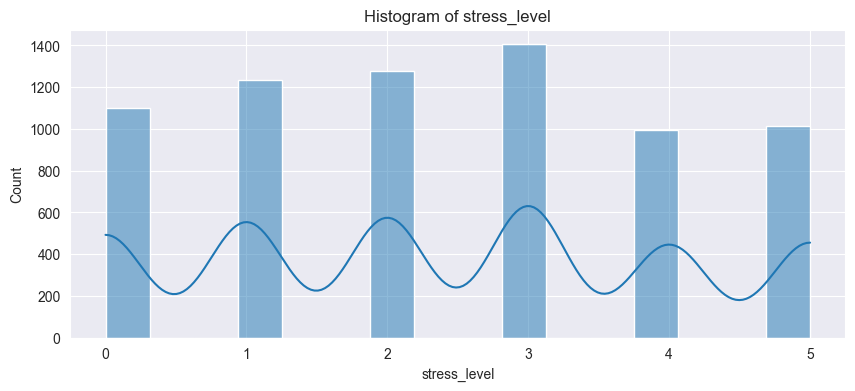

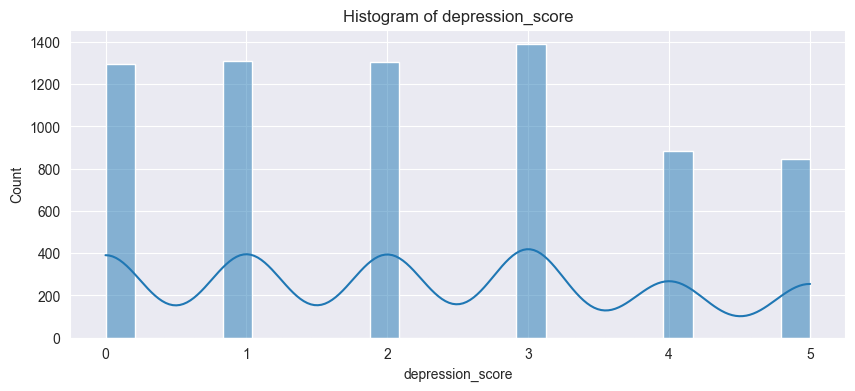

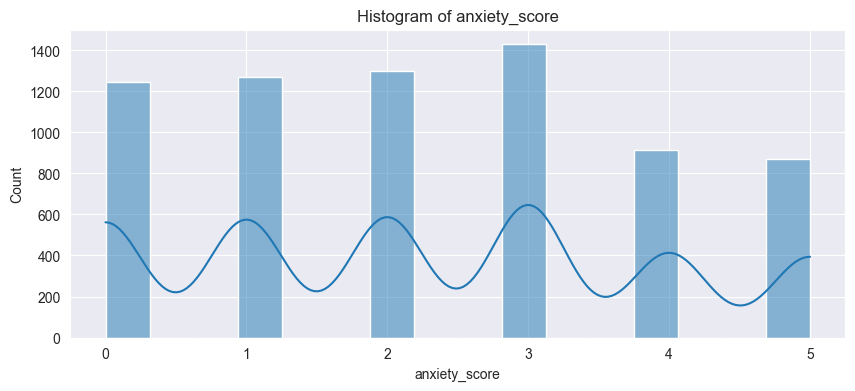

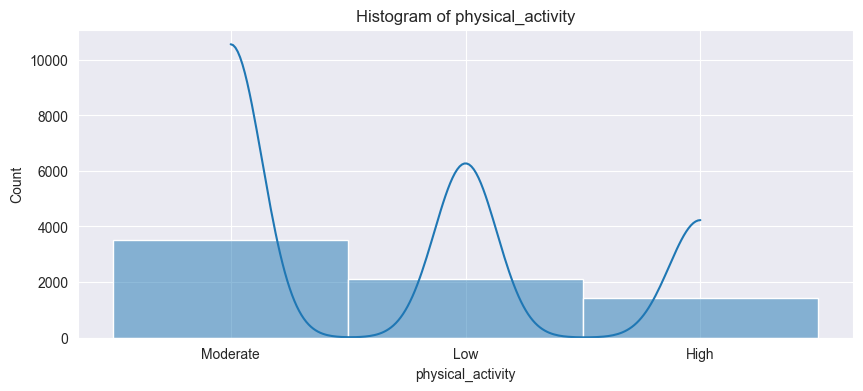

In [14]:
print("Histograms for Dataset 1")
plot_histograms(df, ['stress_level', 'depression_score', 'anxiety_score', 'physical_activity'])

Histograms for Dataset 2


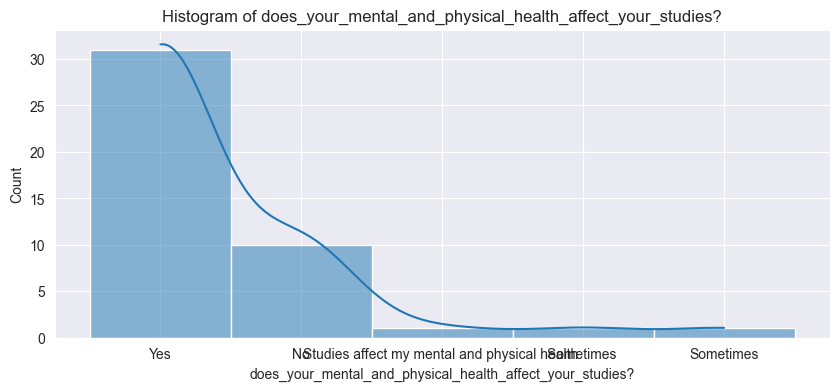

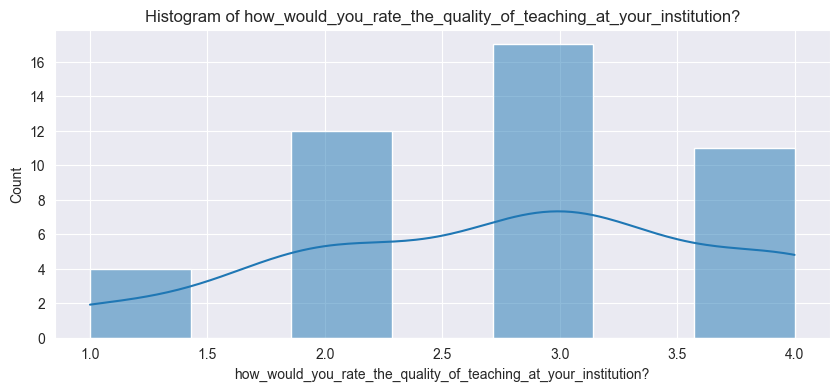

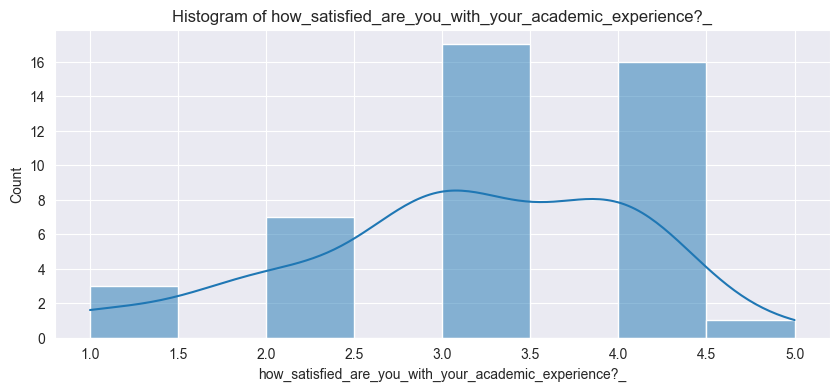

In [15]:
print("Histograms for Dataset 2")
plot_histograms(df1, ['does_your_mental_and_physical_health_affect_your_studies?', 'how_would_you_rate_the_quality_of_teaching_at_your_institution?', 'how_satisfied_are_you_with_your_academic_experience?_'])

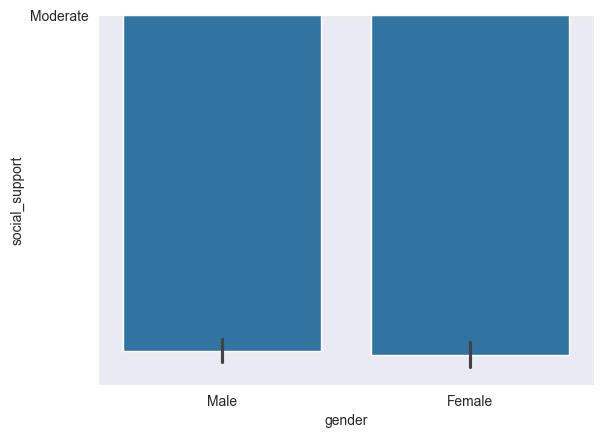

In [16]:
sns.barplot(x='gender', y='social_support', data=df)
plt.show()

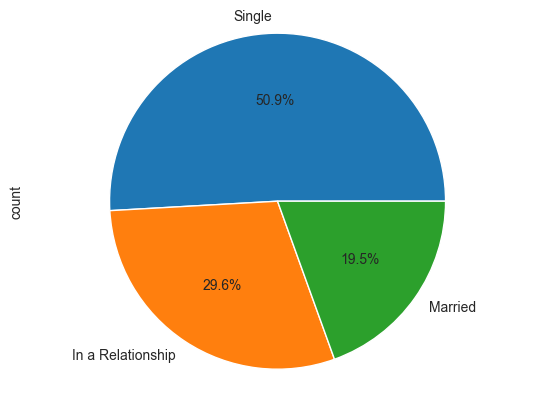

In [17]:
df['relationship_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
le = LabelEncoder()
df['social_support'] = le.fit_transform(df['social_support'])
df.groupby('gender')['social_support'].mean()

gender
Female    1.179856
Male      1.188610
Name: social_support, dtype: float64

In [19]:
df['relationship_status'] = le.fit_transform(df['relationship_status'])
df.groupby('gender')['relationship_status'].mean()

gender
Female    1.214388
Male      1.211446
Name: relationship_status, dtype: float64

In [20]:
df1.groupby('gender')['how_satisfied_are_you_with_your_current_social_relationships?'].mean()

gender
Female    3.444444
Male      3.882353
Name: how_satisfied_are_you_with_your_current_social_relationships?, dtype: float64

In [21]:
df1.groupby('gender')['how_would_you_rate_your_overall_physical_health?'].mean()

gender
Female    6.333333
Male      7.588235
Name: how_would_you_rate_your_overall_physical_health?, dtype: float64

In [22]:
df1.groupby('gender')['rate_the_level_of_mental_health_support_at_your_institution.'].mean()

gender
Female    1.777778
Male      1.882353
Name: rate_the_level_of_mental_health_support_at_your_institution., dtype: float64

In [23]:
df1.groupby('gender')['how_often_do_you_feel_stressed_or_overwhelmed?'].mean()

gender
Female    3.740741
Male      2.882353
Name: how_often_do_you_feel_stressed_or_overwhelmed?, dtype: float64

In [24]:
df1.groupby('gender')['if_yes,_how_often?'].mean()

gender
Female    3.296296
Male      3.500000
Name: if_yes,_how_often?, dtype: float64

In [25]:
df1.groupby('gender')['how_would_you_rate_your_overall_mental_well-being?'].mean()

gender
Female    5.777778
Male      7.352941
Name: how_would_you_rate_your_overall_mental_well-being?, dtype: float64

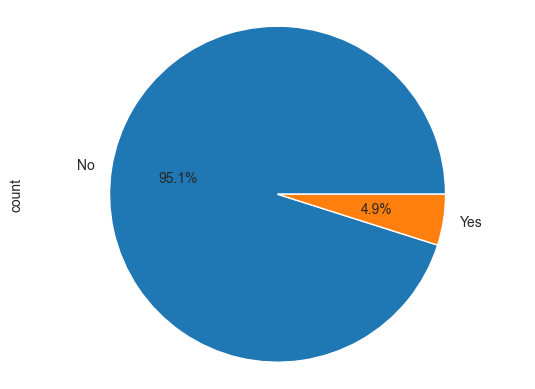

In [26]:
df['chronic_illness'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

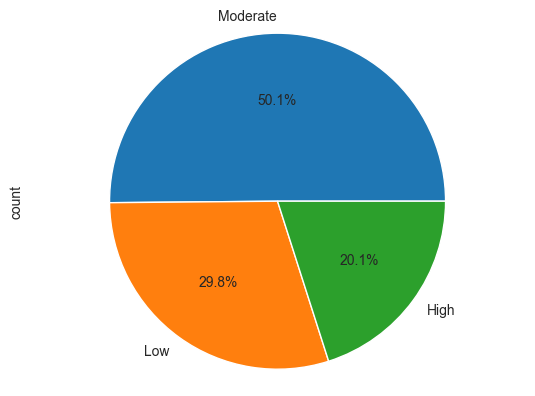

In [27]:
df['physical_activity'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

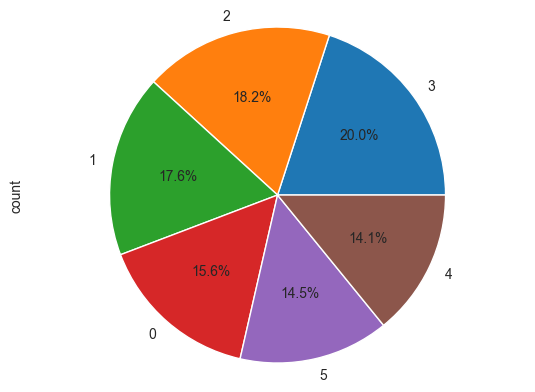

In [28]:
df['stress_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

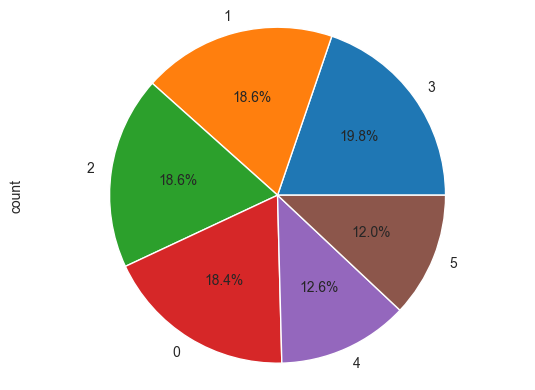

In [29]:
df['depression_score'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

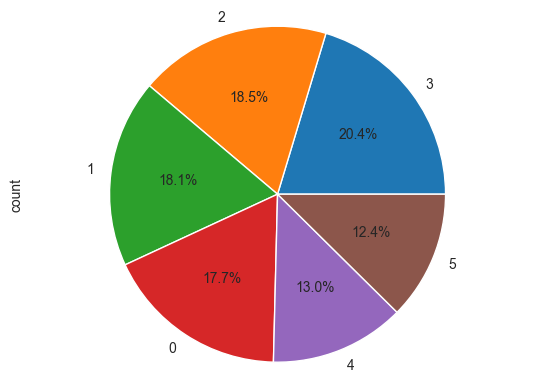

In [30]:
df['anxiety_score'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

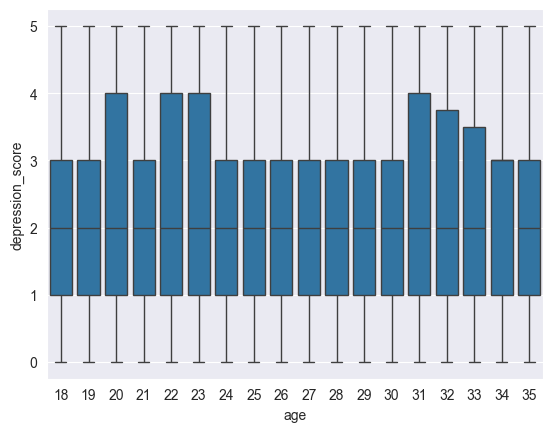

In [31]:
sns.boxplot(x='age', y='depression_score', data=df)
plt.show()

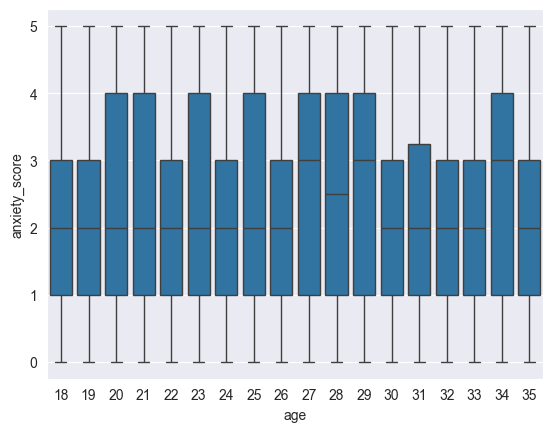

In [32]:
sns.boxplot(x='age', y='anxiety_score', data=df)
plt.show()

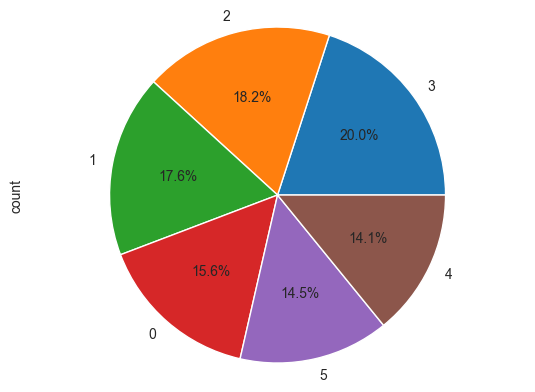

In [33]:
df['stress_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

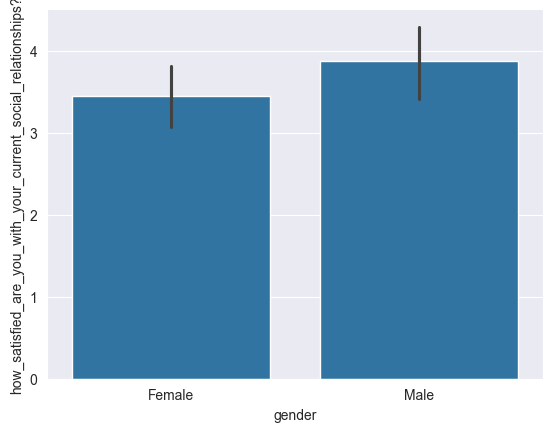

In [34]:
sns.barplot(x='gender', y='how_satisfied_are_you_with_your_current_social_relationships?', data=df1)
plt.show()

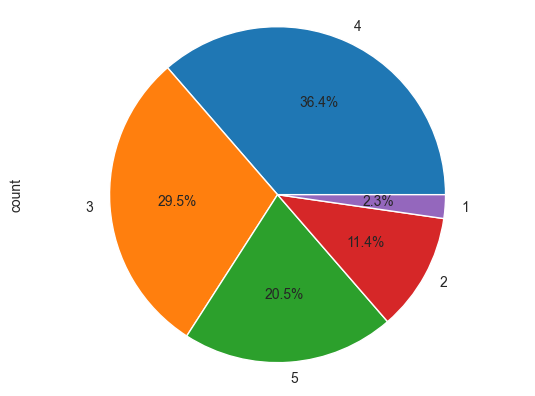

In [35]:
df1['how_satisfied_are_you_with_your_current_social_relationships?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

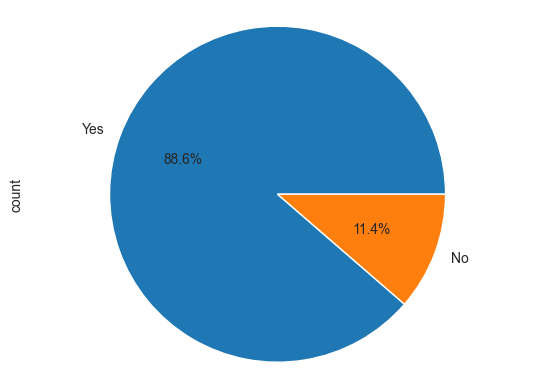

In [36]:
df1['do_you_feel_supported_by_your_peers_and_family?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

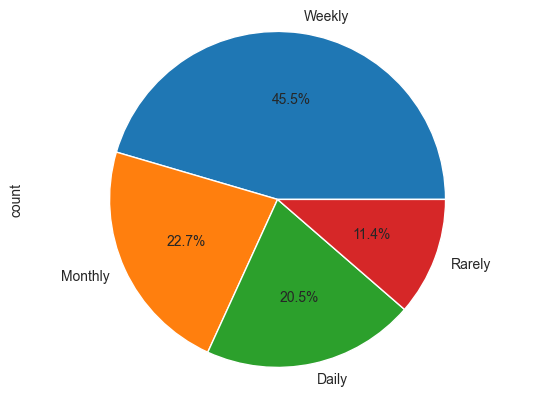

In [37]:
df1['how_often_do_you_engage_in_social_activities?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

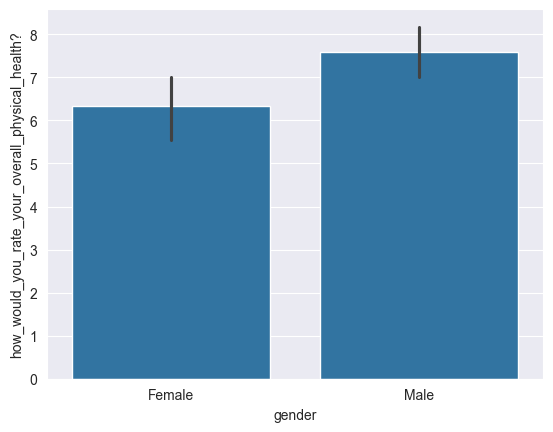

In [38]:
sns.barplot(x='gender', y='how_would_you_rate_your_overall_physical_health?', data=df1)
plt.show()

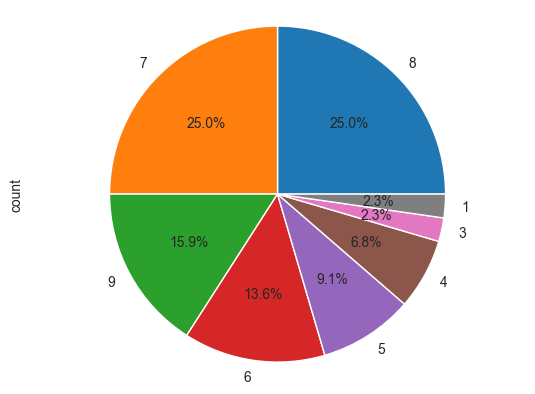

In [39]:
df1['how_would_you_rate_your_overall_physical_health?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

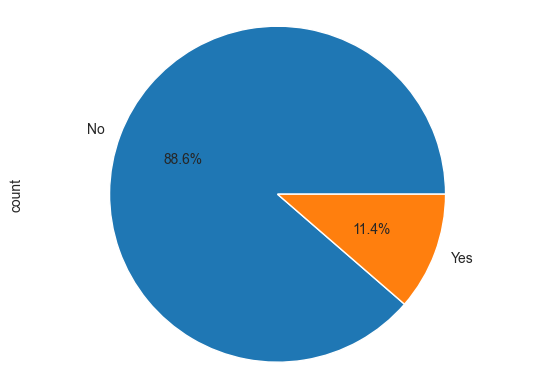

In [40]:
df1['do_you_have_any_chronic_physical_health_conditions?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

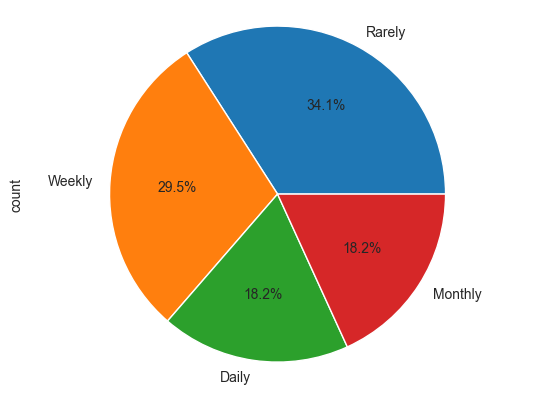

In [41]:
df1['how_often_do_you_engage_in_physical_exercise?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

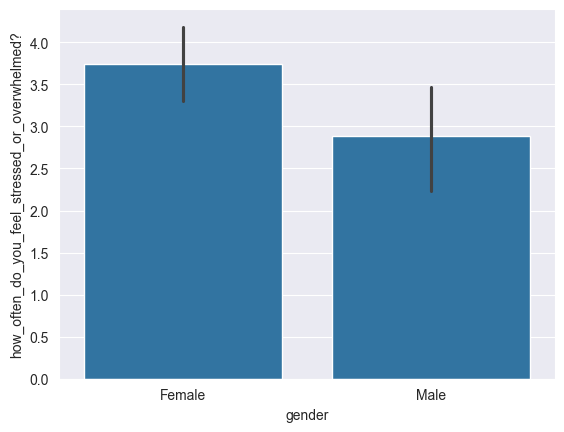

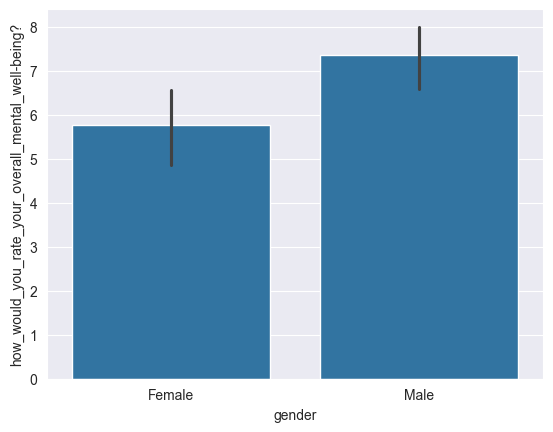

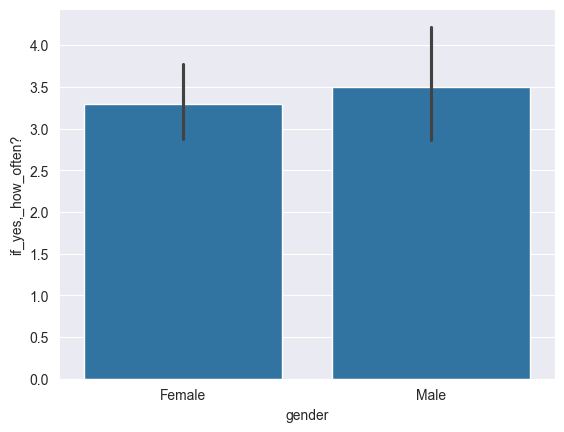

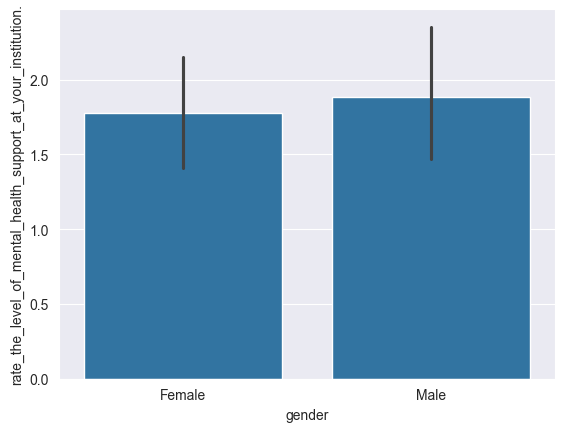

In [42]:
sns.barplot(x='gender', y='how_often_do_you_feel_stressed_or_overwhelmed?', data=df1)
plt.show()
sns.barplot(x='gender', y='how_would_you_rate_your_overall_mental_well-being?', data=df1)
plt.show()
sns.barplot(x='gender', y='if_yes,_how_often?', data=df1)
plt.show()
sns.barplot(x='gender', y='rate_the_level_of_mental_health_support_at_your_institution.', data=df1)
plt.show()

<Axes: ylabel='count'>

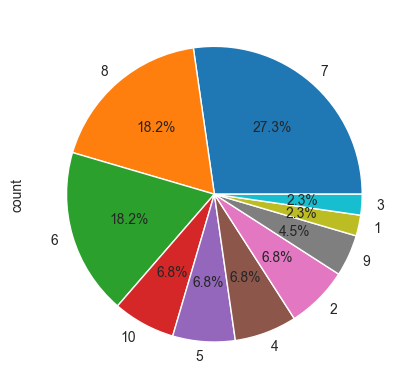

In [43]:
df1['how_would_you_rate_your_overall_mental_well-being?'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

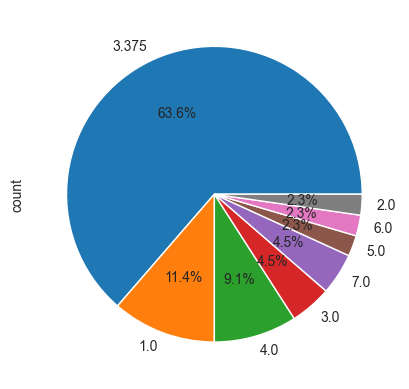

In [44]:
df1['if_yes,_how_often?'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

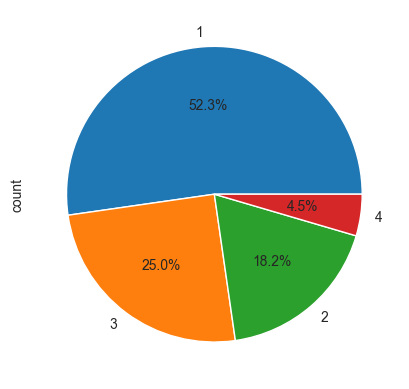

In [45]:
df1['rate_the_level_of_mental_health_support_at_your_institution.'].value_counts().plot(kind='pie', autopct='%1.1f%%')

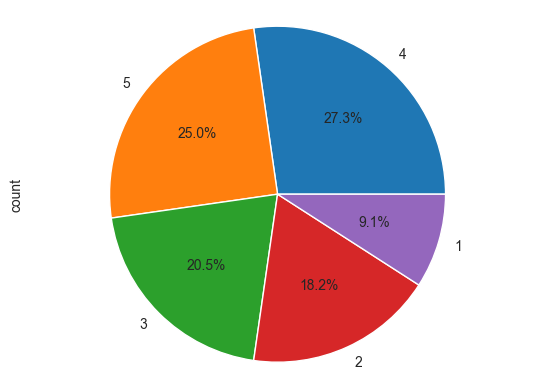

In [46]:
df1['how_often_do_you_feel_stressed_or_overwhelmed?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

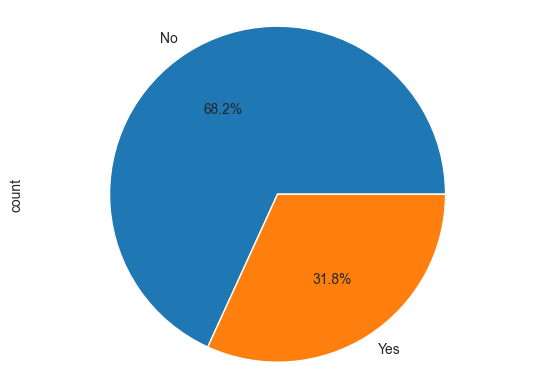

In [47]:
df1['do_you_have_access_to_mental_health_resources?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

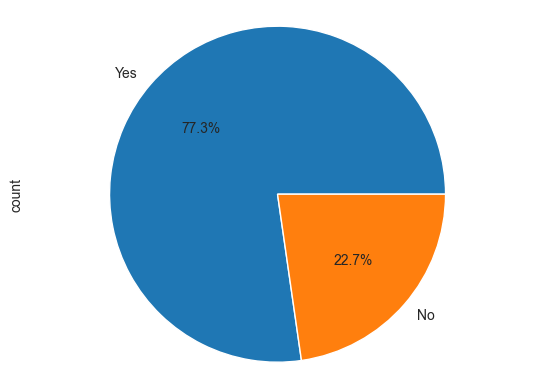

In [48]:
df1['do_you_feel_confident_in_handling_emotional_challenges?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

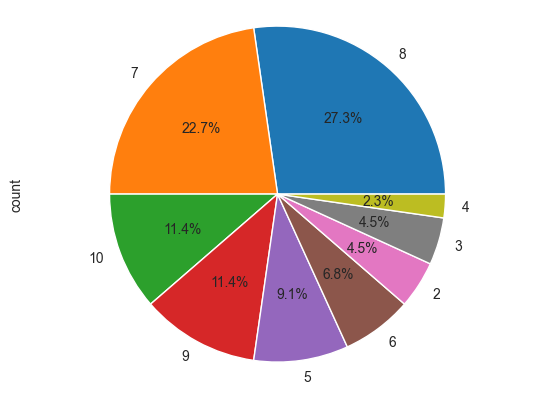

In [49]:
df1['how_often_do_you_feel_hopeful_about_the_future?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

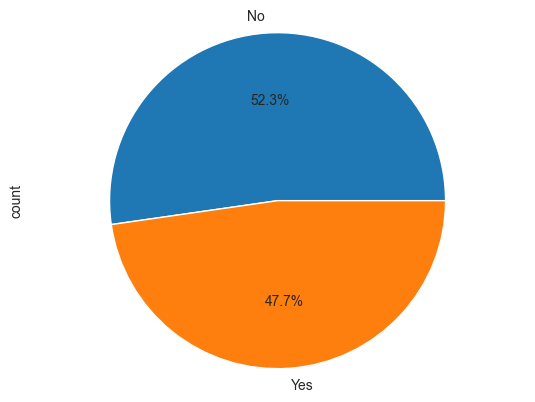

In [50]:
df1['do_you_feel_emotionally_supported_by_your_peers_and_faculty?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Machine Learning Modeling

predict a student's stress level based on various factors such as age, gender, social support, relationship status, chronic illness, physical activity, depression score, and anxiety score.

In [51]:
X = df.drop('stress_level', axis=1)
y = df['stress_level']
X

,age,gender,depression_score,anxiety_score,physical_activity,social_support,relationship_status,chronic_illness
0,25,Male,3,2,Moderate,2,1,No
1,24,Female,3,0,Low,1,2,No
2,19,Female,0,3,Low,2,0,No
3,19,Male,1,0,Low,2,2,No
4,18,Male,3,4,Low,0,1,Yes
...,...,...,...,...,...,...,...,...
7017,20,Female,1,5,Low,0,2,No
7018,24,Female,4,1,Moderate,0,2,No
7019,26,Male,5,1,High,2,1,Yes
7020,24,Male,3,4,High,2,2,Yes


In [52]:
numeric_features = ['age', 'depression_score', 'anxiety_score', 'social_support', 'relationship_status']
categorical_features = ['gender', 'physical_activity', 'chronic_illness']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Model creation: Random Forest Classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'depression_score',
                                                   'anxiety_score',
                                                   'social_support',
                                                   'relationship_status']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'physical_activity',
                                                   'chronic_illness'])])),
                ('classifier', RandomForestClassifier())])

In [55]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, ..., 3, 1, 0], dtype=int64)

In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.16797153024911032


In [57]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.14      0.14       219
           1       0.18      0.17      0.17       263
           2       0.14      0.15      0.15       240
           3       0.19      0.20      0.20       293
           4       0.16      0.18      0.17       180
           5       0.17      0.16      0.16       210

    accuracy                           0.17      1405
   macro avg       0.17      0.17      0.17      1405
weighted avg       0.17      0.17      0.17      1405


In [58]:
X = df1.drop('how_often_do_you_feel_stressed_or_overwhelmed?', axis=1)
y = df1['how_often_do_you_feel_stressed_or_overwhelmed?']
X

,age,gender,education_level,how_often_do_you_engage_in_social_activities?,how_satisfied_are_you_with_your_current_social_relationships?,do_you_feel_supported_by_your_peers_and_family?,how_would_you_rate_your_overall_physical_health?,do_you_have_any_chronic_physical_health_conditions?,how_often_do_you_engage_in_physical_exercise?,have_you_ever_sought_help_for_mental_health_issues?,...,rate_your_ability_to_recover_from_emotional_challenges.,do_you_feel_emotionally_supported_by_your_peers_and_faculty?,do_you_feel_your_coursework_is_manageable?_,how_do_you_perceive_your_academic_performance?,does_your_mental_and_physical_health_affect_your_studies?,what_support_do_you_think_would_improve_your_academic_success?,how_satisfied_are_you_with_your_academic_experience?_,how_would_you_rate_the_quality_of_teaching_at_your_institution?,what_improvements_would_you_suggest_for_student_well-being_services?,additional_comments_or_feedback
0,18-24,Female,Undergraduate,Weekly,4,Yes,8,No,Daily,Yes,...,4,Yes,Yes,Acceptable,Yes,Emotional and financial support,4,3,A solid therapist,Good luck.
1,18-24,Female,Undergraduate,Weekly,3,No,7,No,Rarely,Yes,...,3,Yes,Yes,.,Yes,.,1,2,A solid therapist,Good luck.
2,18-24,Female,Undergraduate,Weekly,4,Yes,7,No,Rarely,No,...,4,No,Yes,fine,Yes,better teaching conditions,3,2,A solid therapist,Good luck.
3,18-24,Male,Undergraduate,Weekly,5,Yes,9,No,Daily,No,...,5,Yes,Yes,I'm dealing with it so smoothly without worries,Yes,Better academic conditions,4,3,Teachers with a great knowledge in pedagogy an...,Good luck.
4,18-24,Female,Graduate,Weekly,4,Yes,7,No,Monthly,No,...,3,Yes,Yes,Good,Yes,Reducing study hours,3,3,A solid therapist,Good luck.
5,18-24,Female,Undergraduate,Weekly,2,Yes,7,No,Weekly,Yes,...,4,No,No,bad and not enjoyable,Yes,emotional,2,2,they can do campaigns,Good luck.
6,18-24,Female,Undergraduate,Daily,4,Yes,8,No,Weekly,No,...,4,No,No,.,Yes,.,3,3,A solid therapist,Good luck.
7,18-24,Female,Undergraduate,Monthly,3,Yes,4,No,Rarely,No,...,4,No,Yes,,Yes,,4,3,A solid therapist,Good luck.
8,18-24,Male,Undergraduate,Weekly,5,Yes,8,No,Daily,No,...,5,Yes,No,Good,No,Friends and family,4,3,A solid therapist,Good luck.
9,18-24,Male,Undergraduate,Weekly,4,Yes,9,No,Weekly,No,...,5,Yes,Yes,I've always excelled without needing to study ...,No,I think it's natural to be distracted from you...,4,4,Make information more accessible. I'm in my th...,Good luck.


In [59]:
numeric_features = ['if_yes,_how_often?', 'how_would_you_rate_your_overall_mental_well-being?', 'rate_the_level_of_mental_health_support_at_your_institution.']
categorical_features = ['age', 'gender', 'have_you_experienced_significant_stress_or_anxiety_in_the_past_month?']

In [60]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Model creation: Random Forest Classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['if_yes,_how_often?',
                                                   'how_would_you_rate_your_overall_mental_well-being?',
                                                   'rate_the_level_of_mental_health_support_at_your_institution.']),
                                                 ('cat', OneHotEncoder(),
                                                  ['age', 'gender',
                                                   'have_you_experienced_significant_stress_or_anxiety_in_the_past_month?'])])),
                ('classifier', RandomForestClassifier())])

In [64]:
y_pred = model.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4444444444444444


In [66]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.75      0.75      0.75         4

    accuracy                           0.44         9
   macro avg       0.25      0.35      0.28         9
weighted avg       0.39      0.44      0.41         9


# Visualizations

Histogram of Ages

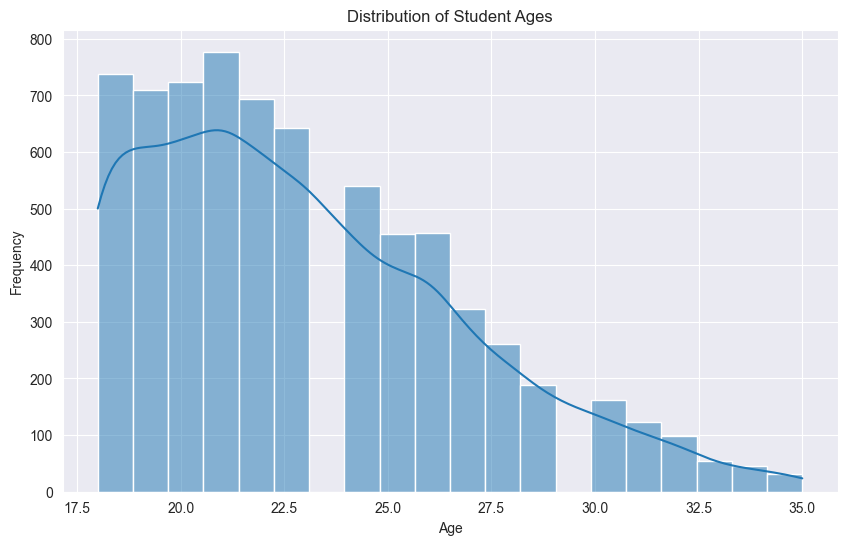

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Gender distribution

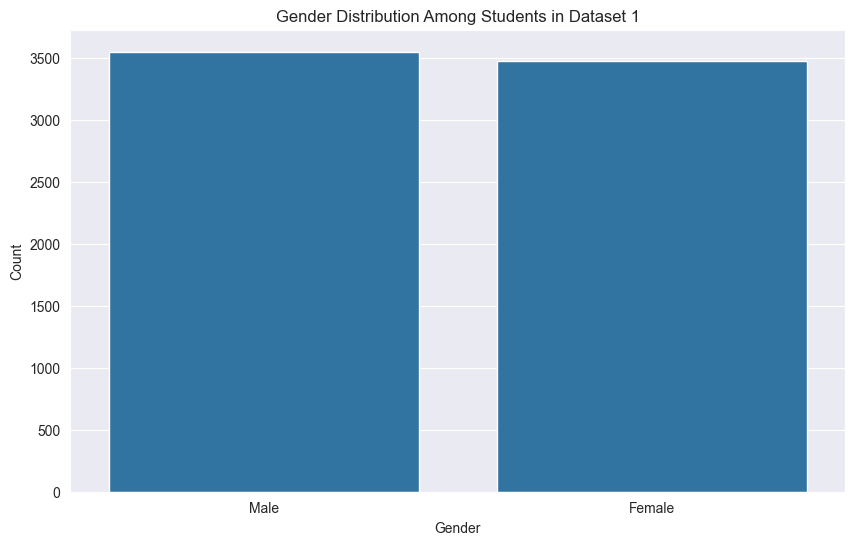

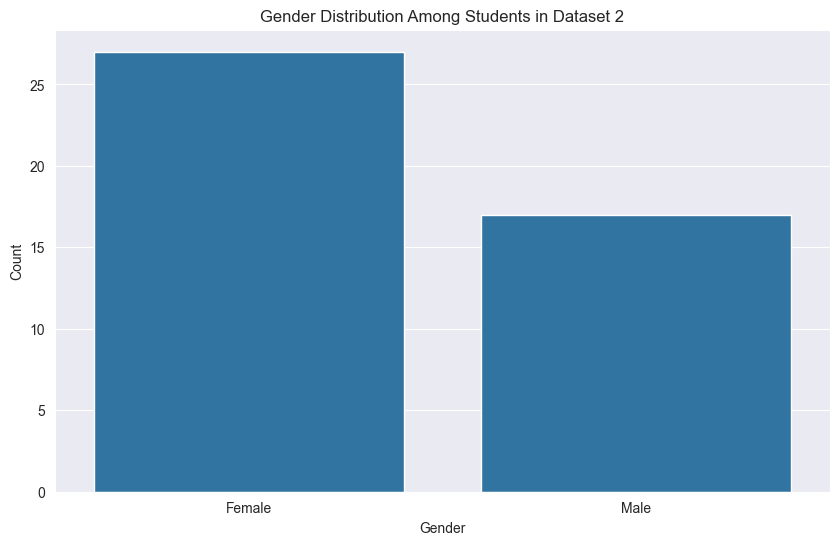

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution Among Students in Dataset 1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df1)
plt.title('Gender Distribution Among Students in Dataset 2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Stress Levels in different Age groups

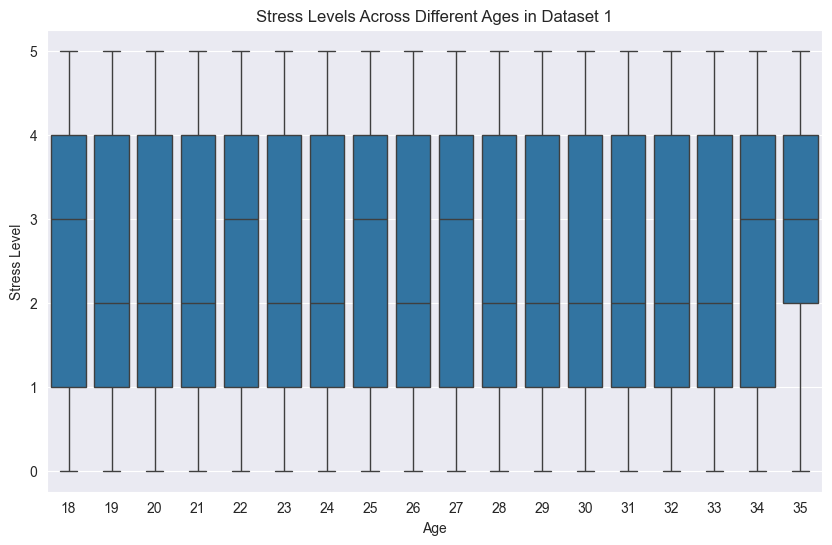

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='stress_level', data=df)
plt.title('Stress Levels Across Different Ages in Dataset 1')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.show()

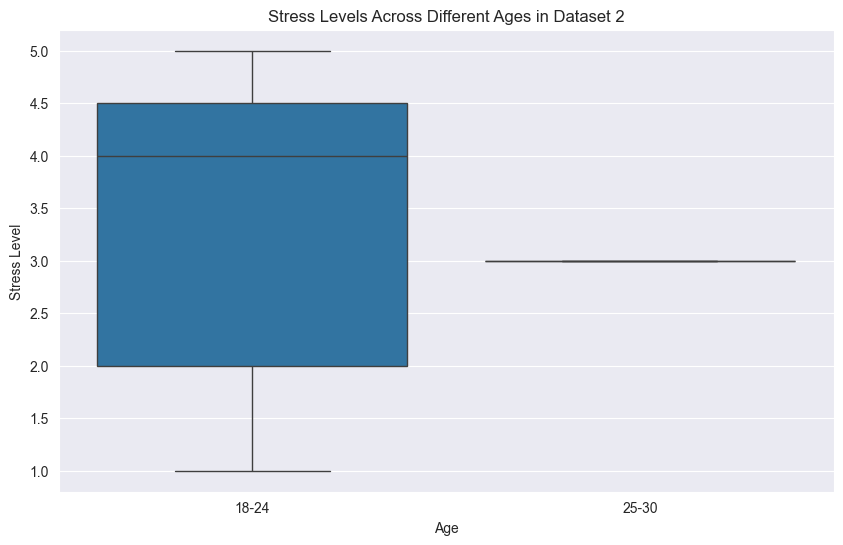

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='how_often_do_you_feel_stressed_or_overwhelmed?', data=df1)
plt.title('Stress Levels Across Different Ages in Dataset 2')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.show()

Relationship between Social Support and Mental Health

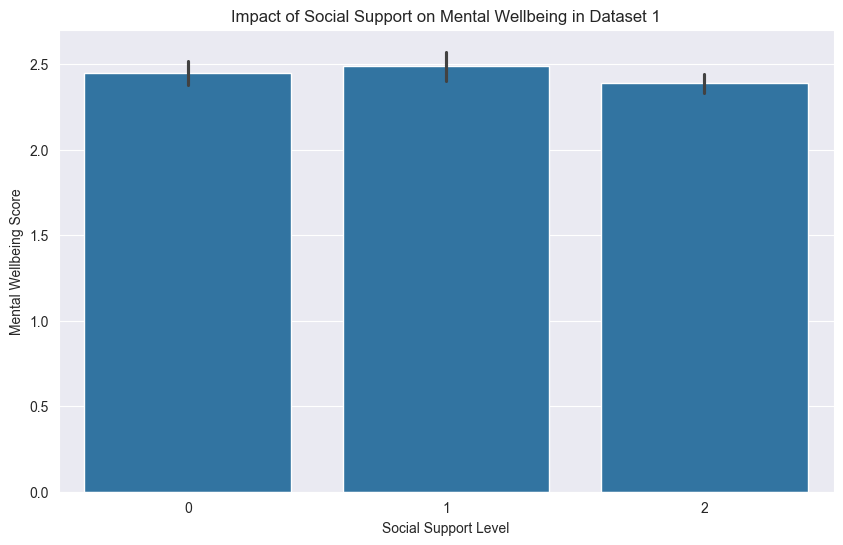

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='social_support', y='stress_level', data=df)
plt.title('Impact of Social Support on Mental Wellbeing in Dataset 1')
plt.xlabel('Social Support Level')
plt.ylabel('Mental Wellbeing Score')
plt.show()

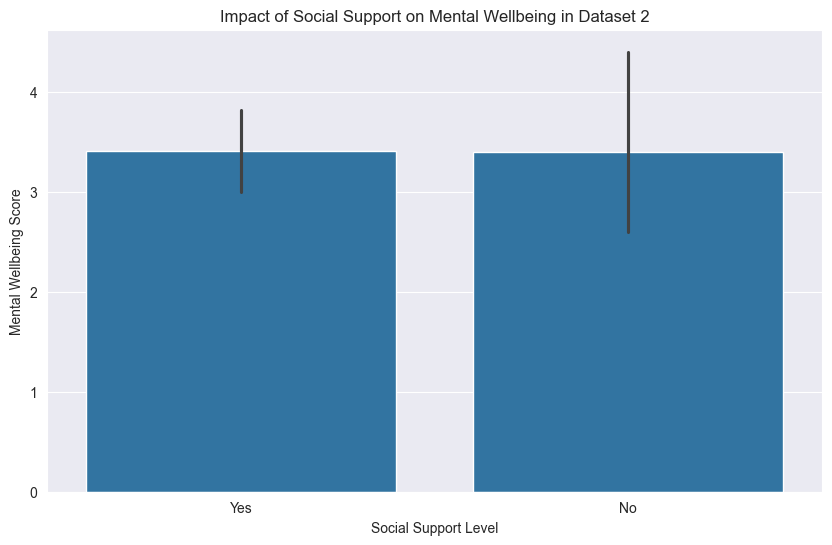

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='do_you_feel_supported_by_your_peers_and_family?', y='how_often_do_you_feel_stressed_or_overwhelmed?', data=df1)
plt.title('Impact of Social Support on Mental Wellbeing in Dataset 2')
plt.xlabel('Social Support Level')
plt.ylabel('Mental Wellbeing Score')
plt.show()

# Insights and Recommendations

# 1- Distribution of Student Ages: 
The majority of students are between the ages of 20 and 25, suggesting a predominantly young cohort. There is a noticeable decline in frequency as age increases, indicating fewer older students.
Recommendation: Focus resources and support systems on the majority age group while ensuring that older students' unique needs are not overlooked.

# 2- Gender Distribution: 
There appears to be a relatively balanced distribution of male and female students in Dataset 1, while in Dataset 2, female students are more than male students.
Recommendation: Any interventions or support systems should be gender-inclusive, taking into account the slight gender variance between datasets.

# 3- Stress Levels Across Different Ages: 
There is a visible trend of stress levels being high across all ages, but particularly among the mid-20s age range.
Recommendation: Implement targeted stress management and mental health workshops focusing on the most affected age groups.

# 4- Impact of Social Support on Mental Wellbeing: 
The visualizations suggest that higher social support levels correlate with better mental well-being scores.
Recommendation: Encourage the development of social groups and peer support networks to enhance students' social support.

# 5- How Mental and Physical Health Affect Studies: 
The visualizations indicate that students who report that their mental and physical health affects their studies tend to also have higher stress levels.
Recommendation: Provide access to mental health counselors and physical wellness programs to help students manage the impact of health on their academic performance.

# 6- Quality of Teaching and Academic Experience Satisfaction: 
Students' satisfaction with teaching quality and academic experience varies, with some indicating high satisfaction and others low.
Recommendation: Conduct further surveys to identify specific areas of dissatisfaction and address them through faculty training programs and curriculum adjustments.

# 7- Differences Between Datasets: 
It’s noted that there are variations between Dataset 1 and Dataset 2 in terms of stress levels and the impact of social support. This indicates the possibility of different environmental or demographic factors at play.
Recommendation: Conduct a comparative study to understand the underlying reasons for the differences between datasets, which could inform more tailored approaches to student well-being.

# Conclusion

In conclusion, the analysis highlights the importance of social support, stress management, and targeted resources for specific demographic groups. It is recommended to use these insights to inform the development of student well-being programs that are both proactive and reactive to students' needs. Additionally, further analysis could be beneficial to understand the nuances within each dataset more deeply.